In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


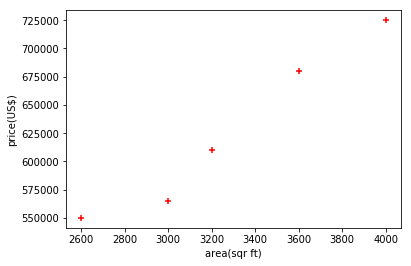

In [4]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
reg.coef_

array([135.78767123])

In [7]:
reg.intercept_

180616.43835616432

In [8]:
reg.predict([[3300]])

array([628715.75342466])

In [9]:
135.78767123*3300+180616.43835616432

628715.7534151643

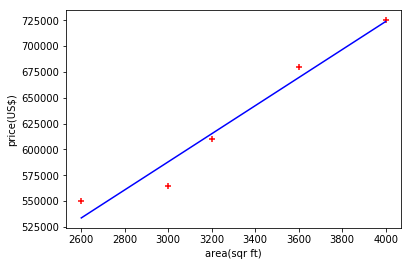

In [10]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [11]:
d = pd.read_csv("areas.csv")
d.head(3)

,area
0,1000
1,1500
2,2300


In [12]:
p = reg.predict(d)

In [13]:
d['prices'] = p

In [14]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [15]:
d.to_csv("prediction.csv")

In [16]:
import pickle

In [18]:
with open('reg_pickle','wb') as f:
    pickle.dump(reg,f)

In [25]:
with open('reg_pickle','rb') as f:
    mp = pickle.load(f)

In [26]:
mp.predict([[5000]])

array([859554.79452055])

In [27]:
from sklearn.externals import joblib

In [28]:
joblib.dump(reg,'reg_joblib')

['reg_joblib']

In [32]:
mj = joblib.load('reg_joblib')

In [34]:
mj.predict([[5000]])

array([859554.79452055])